### Goals <a class="anchor" id="Goals"></a>

This notebook contains an analysis on some marketing data. The goal for this project was to do the following:
* Get acquainted with the data
* Clean the data so it is ready for analysis
* Develop some questions for analysis
* Analyze variables within the data to gain patterns and insights on these questions

### Data <a class="anchor" id="Data"></a>

The data for this project was downloaded from Kaggle:

[https://www.kaggle.com/datasets/zwl1234/top-50-bestselling-novels-20092021-of-amazon?resource=download](https://www.kaggle.com/datasets/zwl1234/top-50-bestselling-novels-20092021-of-amazon?resource=download)

Please find the questions developed and conclusions attained from this data at the bootom of this Jupyter Notebook.


In [82]:
#import starting libraries for inital data loading and exploration
import pandas as pd
import numpy as np

# load in data
book_data = pd.read_csv('Amazon Top 50 Books 2009-2021 - Reworked Sheet (1).csv')

# inspect top rows of data by using the .head() function and find dtypes

book_data.head()

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,"17,350",$8.00,$8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,"2,052",$22.00,$22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,"18,979",$15.00,$15,2018,Non Fiction
3,1984,George Orwell,4.7,"70,425",$7.48,$8,2021,Fiction
4,1984 (Signet Classics),George Orwell,4.7,"21,424",$6.00,$6,2017,Fiction


In [83]:
# review data types to ensure all are in the correct format for exploration
book_data.dtypes

Name            object
Author          object
User Rating    float64
Reviews         object
Price           object
Price_r         object
Year             int64
Genre           object
dtype: object

The dataset contains the following definitions for the 8 unique columns:

- Name - Book Title
- Author - Name of persion or organization who wrote the book
- User Rating - Amazon user ratings of the book. 1 being the lowest and 5 the highest
- Reviews - The total number of reviews left on the book
- Price - The price in USD for which the book is sold
- Price_r - The price in USD for which the book is sold rounded up to the nearest dollar
- Year - The year in which the book made the bestsellers list
- Genre - Whether the book is fiction or non-fiction


Based on the dataset's header and column descriptions, I would have expected the dtypes to be as follows:

- Name:            object
- Author:          object
- User Rating:     float64
- Reviews:         float64
- Price:           float64
- Price_r:         int64
- Year:            int64
- Genre:           object

This leaves Price, Price_r and Reviews as incorrect dtypes.

In [84]:
# based on the first five rows of information, Price, Price_r and Reviews were sorted into the 'object' data type due 
# to the ',' and '$' symbols in their values. Therefore we will use regex to remove those and then convert them to numeric
book_data['Price'] = book_data['Price'].replace('\$', '', regex=True)
book_data['Price'] = book_data['Price'].replace('\,', '', regex=True)
book_data.Price = pd.to_numeric(book_data.Price)

In [85]:
book_data['Price_r'] = book_data['Price_r'].replace('\$', '', regex=True)
book_data['Price_r'] = book_data['Price_r'].replace('\,', '', regex=True)
book_data.Price_r = pd.to_numeric(book_data.Price_r)

In [86]:
book_data['Reviews'] = book_data['Reviews'].replace('\$', '', regex=True)
book_data['Reviews'] = book_data['Reviews'].replace('\,', '', regex=True)
book_data.Reviews = pd.to_numeric(book_data.Reviews)

In [87]:
# confirm that data types are now correct
book_data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price          float64
Price_r          int64
Year             int64
Genre           object
dtype: object

In [88]:
# next we will explore our data to find if there are any null or unexpected values present that may impact our results

book_data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Price_r        0
Year           0
Genre          0
dtype: int64

In [89]:
# as there are no null values, next we look at summary statistics in part to start the exploration of the data and in part
# to continue to search for unexpected values
book_data.describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
count,650,650,650.000000,650.000000,650.000000,650.000000,650.000000,650
unique,420,292,NaN,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,NaN,Non Fiction
freq,10,14,NaN,NaN,NaN,NaN,NaN,363
mean,NaN,NaN,4.635385,17204.853846,12.764169,12.796923,2015.000000,NaN
std,NaN,NaN,0.221517,20715.650579,10.176392,10.168624,3.744539,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4789.250000,7.000000,7.000000,2012.000000,NaN
50%,NaN,NaN,4.700000,9957.000000,11.000000,11.000000,2015.000000,NaN
75%,NaN,NaN,4.800000,22359.250000,15.000000,15.000000,2018.000000,NaN


In [90]:
# summmary statistics show that the majority of entries come from authors with more than one entry. The value count will 
# give us more infromation on some of the tops and bottom
book_data.Author.value_counts()

Jeff Kinney                           14
Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
                                      ..
Sean Hannity                           1
Rob Bell                               1
Admiral William H. McRaven             1
Julia Child                            1
Wonder House Books                     1
Name: Author, Length: 292, dtype: int64

In [91]:
# after looking at the multiple entries for the authors, I was curious about the per title entries
book_data.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition    10
The Very Hungry Caterpillar                                                   9
Oh, the Places You'll Go!                                                     9
StrengthsFinder 2.0                                                           9
The 5 Love Languages: The Secret to Love that Lasts                           7
                                                                             ..
Human Body Activity Book for Kids: Hands-On Fun for Grades K-3                1
Howard Stern Comes Again                                                      1
How to Catch a Unicorn                                                        1
How to Be an Antiracist                                                       1
Obama: An Intimate Portrait                                                   1
Name: Name, Length: 420, dtype: int64

The initial data exploration looked at dtypes, null values, summary statistics and value counts to identify whether any values were unexpected or would in some way skew our data. There were no immediate red flags found in the data and we are now able to move forward with basic data visualizations to further explore the data.

The goal of these visualizations is to further explore the data to ensure that the entries provide accurate information and to find interesting angles on the data rather than presenting particularly stunning visualizations. Once we have found some interesting details and verified data, we will recreate our data in a more appealing and titled graphs to better present our findings. You will find these updated graphs in the conclusion section at the bottom.

In [92]:
# load additional libraries that will allow data visualization
import matplotlib.pyplot as plt
import seaborn as sns

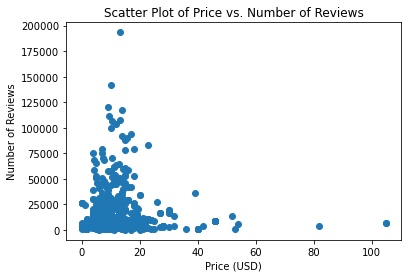

In [94]:
# this scatter plot shows book prices toward number of reviews received. The plot does not show a particular relationship
# between these two variables, however, it does point to outliers in both the price and review fields that could be worth
# further exploration
plt.scatter(book_data.Price, book_data.Reviews)
plt.title("Scatter Plot of Price vs. Number of Reviews")
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.show()

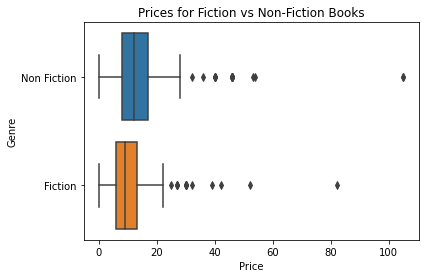

<Figure size 432x288 with 0 Axes>

In [95]:
# Compare prices for Fiction vs Non-Fiction in side-by-side box plot
sns.boxplot(data = book_data, x = 'Price', y = 'Genre')
plt.title('Prices for Fiction vs Non-Fiction Books')
plt.show()
plt.clf()

In [30]:
# after the last two plots showed right-ward outliers for price, I wanted to see more information about the highest priced
# books on the list.
book_data[book_data.Price > 50]

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
87,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105.0,105,2013,Non Fiction
88,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105.0,105,2014,Non Fiction
179,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54.0,54,2016,Non Fiction
187,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,4.8,13471,52.0,52,2016,Fiction
415,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53.0,53,2009,Non Fiction
559,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82.0,82,2009,Fiction


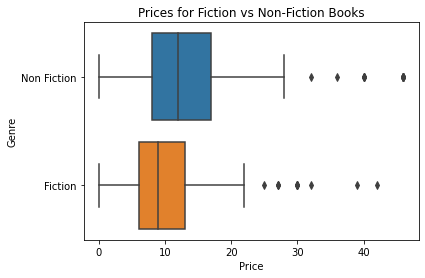

<Figure size 432x288 with 0 Axes>

In [96]:
# a side-by-side box plot to further look at the options without the above outliers
no_price = book_data.Price[book_data.Price < 50]
no_genre = book_data.Genre[book_data.Price < 50]

sns.boxplot(x = no_price, y = no_genre)
plt.title('Prices for Fiction vs Non-Fiction Books')
plt.show()
plt.clf()

In [97]:
# after looking at the two side-by-side box plots, these summary statistics give us further details
book_data.Price[book_data.Genre == 'Fiction'].describe()

count    287.000000
mean      10.565505
std        8.023760
min        0.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       82.000000
Name: Price, dtype: float64

In [98]:
book_data.Price[book_data.Genre == 'Non Fiction'].describe()

count    363.000000
mean      14.502507
std       11.310846
min        0.000000
25%        8.000000
50%       12.000000
75%       17.000000
max      105.000000
Name: Price, dtype: float64

The side-by-side box plots show that both fiction and non-fiction each have a large outlier in the price category.

The largest non-fiction outlier is the "Diagnostic and Statistical Manual of Mental Disorders, Fifth Edition" (DSM-5) priced at 105.00 dollars, the manual is approximately 8 standard deviations (11.31) above the mean (14.50), which would represent a true outlier. It is 51.00 dollars above the next highest priced non-fiction book (Hamilton: The Revolution). Most price-related analysis would benefit from removing this outlier, as can be seen by the more readable and overall better looking second set of side-by-side box plots. 
Additionally, from a repeatable standpoint, the DSM-5 is a publication by the American Psychiatric Association (APA) that updated their DSM-IV edition that was published in 1994. It is used in the United States by researchers, psychiatric drug regulation agencies, health insurance companies, pharmaceutical companies, the legal system, and policymakers as the standard on the classification of mental disorders. It is an indispensible book for its readers, but only serves to skew our price visualizations and calculations.

The largest fiction outlier is "The Twilight Saga Collection" by Stephanie Meyer priced at 82.00 dollars. The collection is 8.9 standard deviations (8.02) above the mean (10.57), which would represent a true outlier. It is 30.00 dollars above the next highest priced fiction book (another collection in the "Harry Potter Paperback Box Set"). Similarly to the DSM-5 above, price-related analysis and visualizations would benefit from removing this outlier.
Additionally, from a repeatable standpoint, the Twilight Saga Collection is a collection of five books that all appear individually on the top 50 list. 

While both of these entries sold very well, the considerations of price, reviews and user rating for a collection and a manual would be rather different from an individual book. Unless we are specifically accounting for them, our visualizations and conclusions would benefit from excluding them.

In [99]:
# on the other side of the data would be the free books. There are 12 such entries that are worth further investigation
book_data[book_data.Price == 0].count()

Name           12
Author         12
User Rating    12
Reviews        12
Price          12
Price_r        12
Year           12
Genre          12
dtype: int64

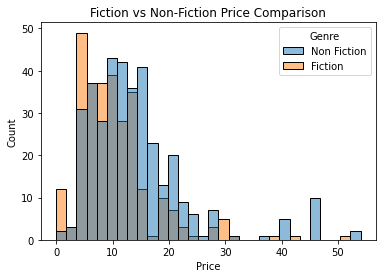

<Figure size 432x288 with 0 Axes>

In [101]:
sns.histplot(book_data[book_data.Price < 60], x = "Price", hue = book_data.Genre)
plt.title('Fiction vs Non-Fiction Price Comparison')
plt.show()
plt.clf()

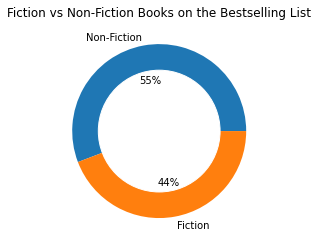

<Figure size 432x288 with 0 Axes>

In [102]:
# create a donut chart of fiction and non-fiction books
genre_labels = ['Non-Fiction', 'Fiction']
genre_value = book_data[book_data.Price < 60].Genre.value_counts()
plt.pie(genre_value, labels = genre_labels, autopct = '%0.1d%%')
plt.title('Fiction vs Non-Fiction Books on the Bestselling List')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()


In [103]:
# the histplot shows that the free books are typically fiction books. This could make sense even with 55% of books being
# non-fiction as fiction books could be more likely to be offered free on Amazon. It does make sense to further investigate
book_data[book_data.Price == 0]

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
55,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0.0,0,2011,Fiction
89,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0.0,0,2013,Fiction
138,Frozen (Little Golden Book),RH Disney,4.7,3642,0.0,0,2014,Fiction
234,JOURNEY TO THE ICE P,RH Disney,4.6,978,0.0,0,2014,Fiction
260,Little Blue Truck,Alice Schertle,4.9,1884,0.0,0,2014,Fiction
429,The Constitution of the United States,Delegates of the Constitutional???€?,4.8,2774,0.0,0,2016,Non Fiction
456,The Getaway,Jeff Kinney,4.8,5836,0.0,0,2017,Fiction
542,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0.0,0,2010,Fiction
597,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2013,Fiction
598,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2014,Fiction


In [50]:
book_data[book_data.Author == 'Alice Schertle']

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
260,Little Blue Truck,Alice Schertle,4.9,1884,0.0,0,2014,Fiction


At first glance the 0.00 dollar price point made sense for a limited number of books. Looking at the list of the 12 books at that price point could also make sense as some sort of fan giveaways. Two of the books are Disney companion books, one is the US Constitution, four entries are for the same book in the American classic, 'To Kill a Mockingbird,' three being Jeff Kinney books with the final two being a children's book and a novella.

However, as I looked into these further, I decided to take a look at details about the 'Little Blue Truck' and I can see on the current Amazon listing, the book does have a price, but is offered on Audible as free as part of their membership. 'The Second Life of Bree Tanner' still has their listing as well and is in a similar place with a price. I further found this article snippet about that book's price:

'Now that it’s out there, Meyer is making two charitable moves with the novella. From June 7 to July 5 it will be available for free download at breetanner.com. Secondly, for each actual sale of the book -- which costs around 10 dollars online -- 1 dollars will be donated to the American Red Cross. On her website, Meyer specifies that the donation will be designated to provide relief to victims of the earthquakes in Haiti and Chile, and others in need.'

Source - https://www.latimes.com/archives/blogs/jacket-copy/story/2010-03-31/stephenie-meyers-new-vampire-book-will-benefit-the-red-cross

While that snippet does indicate a brief period of time where the book would be free for download, it is at a specific website and the Amazon listing was more likely to be the later referenced 'around 10 dollars online.' This brings into question the price of these 12 books and brings into question whether the prices listed throughout are an accurate amount for which they would have been sold in their year on the bestselling novels list.

The other thing that stuck out to me when I pulled just the 0.00 price listings is that the four 'To Kill a Mockingbird' listings have the same rating and reviews entries for all four years. This would seem to indicate that the rating and reviews were all pulled at one time rather than reflecting any sort of information based on the year it was on the list. This would limit the types of conclusions we can draw from the entries as it gives us information for how the listing looks now versus when it was rising/attaining its place in the top sold novels of those years.

In [51]:
book_data[book_data.Author == 'Harper Lee']

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
156,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19.0,19,2015,Fiction
597,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2013,Fiction
598,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2014,Fiction
599,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2015,Fiction
600,To Kill a Mockingbird,Harper Lee,4.8,26234,0.0,0,2016,Fiction
601,To Kill a Mockingbird,Harper Lee,4.8,26234,7.0,7,2019,Fiction


Luckily, running a search for only Harper Lee books, does show that the 'To Kill a Mockingbird' listing shows a price for 2019, which gives a better chance that they may be correct and updated year-to-year.

In [53]:
book_data[book_data.Author == 'Jeff Kinney']

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
45,Big Shot (Diary of a Wimpy Kid,Jeff Kinney,4.9,19470,7.49,8,2021,Fiction
55,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0.00,0,2011,Fiction
89,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0.00,0,2013,Fiction
90,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15.00,15,2009,Fiction
91,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22.00,22,2014,Fiction
98,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12.00,12,2009,Fiction
108,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20.00,20,2016,Fiction
303,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7.00,7,2015,Fiction
434,The Deep End (Diary of a Wimpy Kid Book 15),Jeff Kinney,4.9,26047,7.00,7,2020,Fiction
456,The Getaway,Jeff Kinney,4.8,5836,0.00,0,2017,Fiction


Further investigation shows need for further questioning the 0.00 priced books. As found in the following snippet on Jeff Kinney's Diary of a Wimpy Kid: Hard Luck, Book 8:

'The newest title in the eight-book series is “Hard Luck” (Amulet, 13.95, 224 pages), which the publisher describes this way: “Greg is on a losing streak. His best friend has ditched him, and finding new friends in middle school is a tough task. To change his fortunes, Greg decides to turn his decisions over to chance. Will a roll of the dice turn things around?”'

Source - https://archive.ph/20131111065127/http://www.sacbee.com/2013/11/10/5891223/jeff-kinneys-best-friend-is-a.html#selection-1853.0-1853.365

Entries like this could be better to be treated as missing data for price purposes.

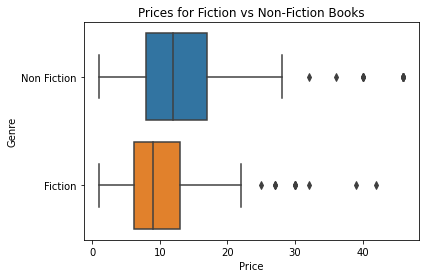

<Figure size 432x288 with 0 Axes>

In [104]:
# side-by-side box plots without the largest outlier and without the 0.00 price entries

new_price = no_price[no_price > 0]
new_genre = no_genre[no_price > 0]

sns.boxplot(x = new_price, y = new_genre)
plt.title('Prices for Fiction vs Non-Fiction Books')
plt.show()
plt.clf()

In [106]:
# summary statistics without the largest outliers and 0.00 price entries
new_price.describe()

count    632.000000
mean      12.414098
std        7.812172
min        1.000000
25%        7.000000
50%       11.000000
75%       15.000000
max       46.000000
Name: Price, dtype: float64

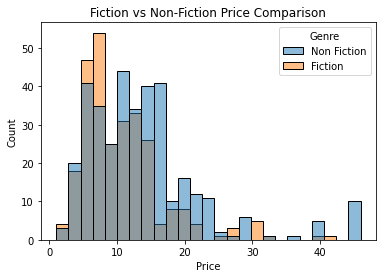

<Figure size 432x288 with 0 Axes>

In [107]:
sns.histplot(x = new_price, hue = new_genre)
plt.title('Fiction vs Non-Fiction Price Comparison')
plt.show()
plt.clf()

In [113]:
# as we are treating the 0.00 entries as missing data and removing the over 60.00 outliers we need a new entry
book_data_new = book_data[book_data.Price > 0.0]

In [114]:
book_data_updated = book_data_new[book_data.Price < 60.0]

C:\Users\dtta2\AppData\Local\Temp/ipykernel_7296/2383113321.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  book_data_updated = book_data_new[book_data.Price < 60.0]


In [116]:
# use updated version to see new summary statistics. As there were 12 0.00 and 3 outliers, we should now have 635 entries
book_data_updated.describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
count,635,635,635.000000,635.000000,635.000000,635.000000,635.000000,635
unique,410,288,NaN,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Gary Chapman,NaN,NaN,NaN,NaN,NaN,Non Fiction
freq,10,13,NaN,NaN,NaN,NaN,NaN,360
mean,NaN,NaN,4.633228,17374.026772,12.605843,12.639370,2015.034646,NaN
std,NaN,NaN,0.222932,20873.997508,8.276592,8.267455,3.767543,NaN
min,NaN,NaN,3.300000,37.000000,1.000000,1.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4881.000000,7.000000,7.000000,2012.000000,NaN
50%,NaN,NaN,4.700000,10052.000000,11.000000,11.000000,2015.000000,NaN
75%,NaN,NaN,4.800000,22335.500000,15.000000,15.000000,2018.000000,NaN


In [118]:
# summary statistics for Non-Fiction books
book_data_updated[book_data_updated.Genre == 'Non Fiction'].describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
count,360,360,360.000000,360.000000,360.000000,360.000000,360.000000,360
unique,225,184,NaN,NaN,NaN,NaN,NaN,1
top,Publication Manual of the American Psychologic...,Gary Chapman,NaN,NaN,NaN,NaN,NaN,Non Fiction
freq,10,13,NaN,NaN,NaN,NaN,NaN,360
mean,NaN,NaN,4.616667,14268.394444,14.040028,14.066667,2015.002778,NaN
std,NaN,NaN,0.188529,17773.548254,9.087265,9.078795,3.738305,NaN
min,NaN,NaN,4.000000,37.000000,1.000000,1.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,3486.750000,8.000000,8.000000,2012.000000,NaN
50%,NaN,NaN,4.650000,7844.000000,12.000000,12.000000,2015.000000,NaN
75%,NaN,NaN,4.800000,19123.000000,17.000000,17.000000,2018.000000,NaN


In [120]:
# summary statistics for Fiction books
book_data_updated[book_data_updated.Genre == 'Fiction'].describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
count,275,275,275.000000,275.000000,275.000000,275.000000,275.000000,275
unique,186,108,NaN,NaN,NaN,NaN,NaN,1
top,"Oh, the Places You'll Go!",Suzanne Collins,NaN,NaN,NaN,NaN,NaN,Fiction
freq,9,12,NaN,NaN,NaN,NaN,NaN,275
mean,NaN,NaN,4.654909,21439.581818,10.728364,10.770909,2015.076364,NaN
std,NaN,NaN,0.259989,23770.767980,6.638413,6.631755,3.811908,NaN
min,NaN,NaN,3.300000,548.000000,1.000000,1.000000,2009.000000,NaN
25%,NaN,NaN,4.600000,7243.000000,6.310000,6.500000,2012.000000,NaN
50%,NaN,NaN,4.700000,14038.000000,9.000000,9.000000,2015.000000,NaN
75%,NaN,NaN,4.800000,24081.000000,13.000000,13.000000,2018.000000,NaN


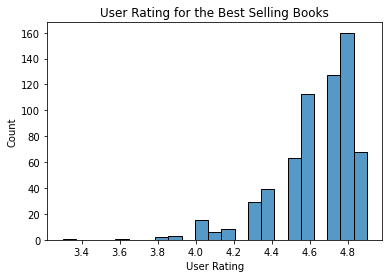

<Figure size 432x288 with 0 Axes>

In [121]:
# as expected, bestselling books are more likely to have reviews close to the maximum of 5
sns.histplot(book_data_updated, x = "User Rating")
plt.title('User Rating for the Best Selling Books')
plt.show()
plt.clf()

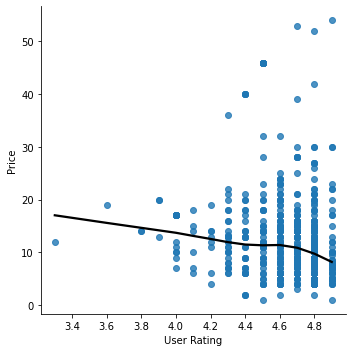

<Figure size 432x288 with 0 Axes>

In [122]:
# there does not appear to be a relationship between user rating and price
sns.lmplot(x = 'User Rating', y = 'Price', data = book_data_updated, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

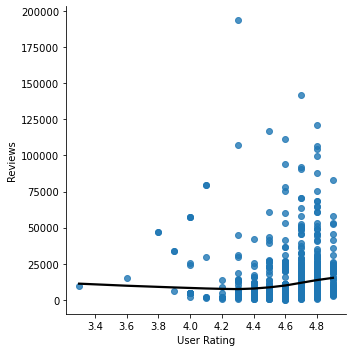

<Figure size 432x288 with 0 Axes>

In [123]:
# there does not appear to be a relationship between user rating and number of reviews
sns.lmplot(x = 'User Rating', y = 'Reviews', data = book_data_updated, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

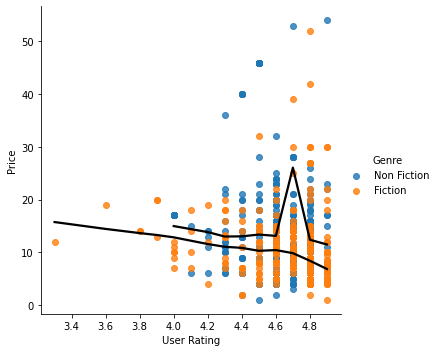

<Figure size 432x288 with 0 Axes>

In [124]:
# there does not appear to be a relationship between user rating and price, even if accounting for genre
sns.lmplot(x = 'User Rating', y = 'Price', hue = 'Genre', data = book_data_updated, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

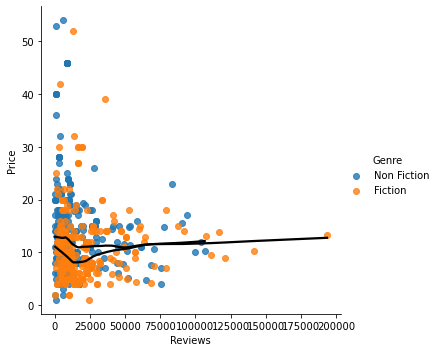

<Figure size 432x288 with 0 Axes>

In [125]:
# there does not appear to be a relationship between reviews and price, even when accounting for genre
sns.lmplot(x = 'Reviews', y = 'Price', hue = 'Genre', data = book_data_updated, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

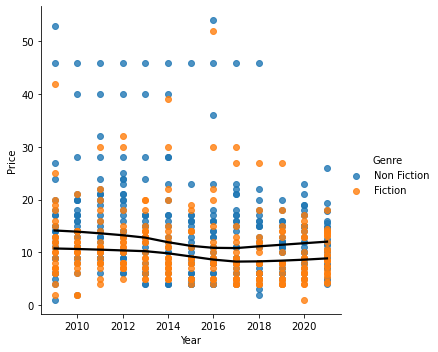

<Figure size 432x288 with 0 Axes>

In [126]:
# prices stay fairly consistent throughout the time period, regardless of genre
sns.lmplot(x = 'Year', y = 'Price', hue = 'Genre', data = book_data_updated, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf()

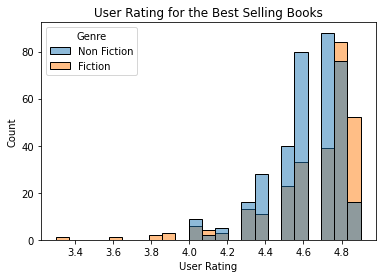

<Figure size 432x288 with 0 Axes>

In [127]:
# Non-Fiction has a more normal distribution around the 4.6 - 4.7 modal while fiction has a left skewing chart
sns.histplot(book_data_updated, x = "User Rating", hue = 'Genre')
plt.title('User Rating for the Best Selling Books')
plt.show()
plt.clf()

In [128]:
book_data_updated.sort_values(by = 'User Rating').head(10)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
424,The Casual Vacancy,J.K. Rowling,3.3,9372,12.0,12,2012,Fiction
156,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19.0,19,2015,Fiction
128,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,14,2012,Fiction
129,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,3.8,47265,14.0,14,2013,Fiction
24,Allegiant,Veronica Roth,3.9,6310,13.0,13,2013,Fiction
468,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20.0,20,2014,Fiction
467,The Goldfinch: A Novel (Pulitzer Prize for Fic...,Donna Tartt,3.9,33844,20.0,20,2013,Fiction
368,StrengthsFinder 2.0,Gallup,4.0,5069,17.0,17,2012,Non Fiction
436,The Elegance of the Hedgehog,Muriel Barbery,4.0,1859,11.0,11,2009,Fiction
619,Wacky Waving Inflatable Tube Guy,Conor Riordan,4.0,25510,7.0,7,2020,Fiction


In [142]:
# 68 entries on the list are tied for highest rating with a 4.9 rating
book_data_updated.sort_values(by = 'User Rating', ascending = False).head(70)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
248,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,4.9,11881,13.00,13,2018,Fiction
569,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5.00,5,2019,Fiction
293,Obama: An Intimate Portrait,Pete Souza,4.9,3192,22.00,22,2017,Non Fiction
420,"The Boy, the Mole, the Fox and the Horse",Charlie Mackesy,4.9,53549,15.00,15,2020,Non Fiction
294,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.00,8,2012,Fiction
...,...,...,...,...,...,...,...,...
45,Big Shot (Diary of a Wimpy Kid,Jeff Kinney,4.9,19470,7.49,8,2021,Fiction
297,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8.00,8,2015,Fiction
208,Humans of New York : Stories,Brandon Stanton,4.9,2812,17.00,17,2015,Non Fiction
158,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9.00,9,2011,Fiction


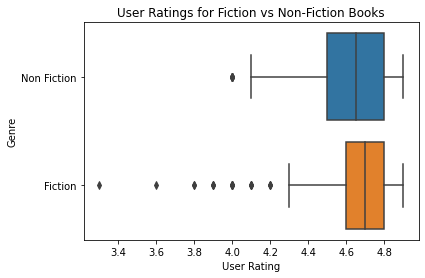

<Figure size 432x288 with 0 Axes>

In [143]:
# Compare user ratings for Fiction vs Non-Fiction in side-by-side box plot
sns.boxplot(data = book_data_updated, x = 'User Rating', y = 'Genre')
plt.title('User Ratings for Fiction vs Non-Fiction Books')
plt.show()
plt.clf()

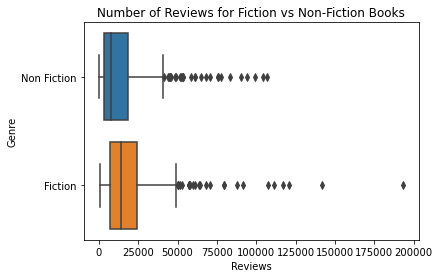

<Figure size 432x288 with 0 Axes>

In [145]:
# Compare number of reviews for Fiction vs Non-Fiction in side-by-side box plot
sns.boxplot(data = book_data, x = 'Reviews', y = 'Genre')
plt.title('Number of Reviews for Fiction vs Non-Fiction Books')
plt.show()
plt.clf()

In [147]:
# fiction books typically have a higher number of reviews while non-fiction has lower
book_data_updated.sort_values(by = 'Reviews', ascending = False)

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
513,The Midnight Library: A Novel,Matt Haig,4.3,193482,13.29,14,2021,Fiction
226,It Ends with Us: A Novel (1),Colleen Hoover,4.7,141748,10.26,11,2021,Fiction
633,Where the Crawdads Sing,Delia Owens,4.8,120727,9.00,9,2020,Fiction
455,The Four Winds: A Novel,Kristin Hannah,4.5,117146,13.79,14,2021,Fiction
539,The Seven Husbands of Evelyn Hugo: A Novel,Taylor Jenkins Reid,4.6,111053,9.42,10,2021,Fiction
...,...,...,...,...,...,...,...,...
430,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11.00,11,2010,Non Fiction
605,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15.00,15,2009,Non Fiction
143,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20.00,20,2010,Non Fiction
361,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17.00,17,2013,Non Fiction


In [148]:
book_data_updated.describe(include = 'all')

,Name,Author,User Rating,Reviews,Price,Price_r,Year,Genre
count,635,635,635.000000,635.000000,635.000000,635.000000,635.000000,635
unique,410,288,NaN,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Gary Chapman,NaN,NaN,NaN,NaN,NaN,Non Fiction
freq,10,13,NaN,NaN,NaN,NaN,NaN,360
mean,NaN,NaN,4.633228,17374.026772,12.605843,12.639370,2015.034646,NaN
std,NaN,NaN,0.222932,20873.997508,8.276592,8.267455,3.767543,NaN
min,NaN,NaN,3.300000,37.000000,1.000000,1.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4881.000000,7.000000,7.000000,2012.000000,NaN
50%,NaN,NaN,4.700000,10052.000000,11.000000,11.000000,2015.000000,NaN
75%,NaN,NaN,4.800000,22335.500000,15.000000,15.000000,2018.000000,NaN


In [158]:
# there are 109 books that appear more than once vs 309 that appear once
book_data_updated.Name.value_counts().head(110)

Publication Manual of the American Psychological Association, 6th Edition       10
The Very Hungry Caterpillar                                                      9
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        9
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Cutting for Stone                                                                2
Proof of Heaven: A Neurosurgeon's Journey into the Afterlife                     2
Untamed                                                                          2
How to Catch a Mermaid                                                           2
The Guernsey Literary and Potato Peel Pie Society                                1
Name: Name, Length: 110, dtype: int64

In [167]:
# there are 136 authors who appear more than once vs 152 that appear once
book_data_updated.Author.value_counts().head(140)

Gary Chapman                          13
Suzanne Collins                       12
American Psychological Association    11
Rick Riordan                          11
Jeff Kinney                           11
                                      ..
Doug Lemov                             2
Margaret Atwood                        1
Jon Stewart                            1
Jonathan Cahn                          1
Mary Ann Shaffer                       1
Name: Author, Length: 140, dtype: int64

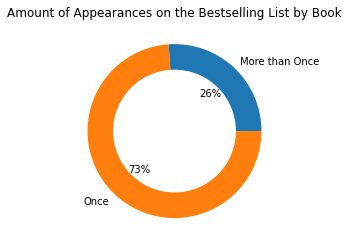

<Figure size 432x288 with 0 Axes>

In [171]:
# create a donut chart of book appearances
appearance_labels = ['More than Once', 'Once']
appearance_values = [109, 309] 
plt.pie(appearance_values, labels = appearance_labels, autopct = '%0.1d%%')
plt.title('Amount of Appearances on the Bestselling List by Book')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()


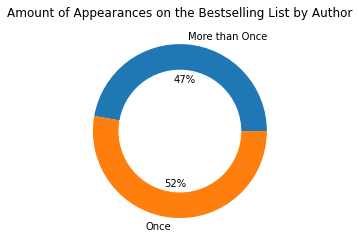

<Figure size 432x288 with 0 Axes>

In [172]:
# create a donut chart of author appearances
appearance_labels = ['More than Once', 'Once']
appearance_value = [136, 152] 
plt.pie(appearance_value, labels = appearance_labels, autopct = '%0.1d%%')
plt.title('Amount of Appearances on the Bestselling List by Author')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
plt.clf()
